# **Dataset : food_price_ind**


https://docs.google.com/spreadsheets/d/1wWypGVdg8HgiOaNzQyLa03Xcmu3bNCaxK_3r0mipvv4/edit?gid=220366586#gid=220366586

The dataset contains information about food prices in India and includes the following features

Column Names:

1.date: Date of the price observation.

2.admin1: Administrative region (state).

3.admin2: Sub-administrative region (district).

4.market: Market name.

5.latitude: Latitude of the market location.

6.longitude: Longitude of the market location.

7.category: Category of the food item (e.g., cereals, oil, etc.).

8.commodity: Specific commodity name (e.g., rice, sugar, etc.).

9.unit: Unit of measurement (e.g., KG, liter).

10.priceflag: Indicates price status (e.g., actual).

11.pricetype: Type of price (e.g., retail).

12.currency: Currency in which the price is reported (e.g., INR).

13.price: Price in local currency.

14.usdprice: Price converted to USD.


### **problem statement**:

I aim to predict food prices in various Indian markets based on factors such as location, commodity type, and market characteristics. This will help identify price trends and regional differences to support better decision-making in food supply and pricing strategies.

# **1- Understand the Data**

In [ ]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the "food price" dataset
df=pd.read_csv("/content/food_prices_ind.csv")

# Preview the first few rows of the dataset
df.head()

<ipython-input-253-8bb690441813>:2: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/food_prices_ind.csv")


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167


In [ ]:
# Check the shape of the dataset
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

Dataset contains 168496 rows and 14 columns.


In [ ]:
# column names in the dataset
df.columns

Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')

In [ ]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168496 entries, 0 to 168495
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       168496 non-null  object
 1   admin1     167867 non-null  object
 2   admin2     167867 non-null  object
 3   market     168496 non-null  object
 4   latitude   167867 non-null  object
 5   longitude  167867 non-null  object
 6   category   168496 non-null  object
 7   commodity  168496 non-null  object
 8   unit       168496 non-null  object
 9   priceflag  168496 non-null  object
 10  pricetype  168496 non-null  object
 11  currency   168496 non-null  object
 12  price      168496 non-null  object
 13  usdprice   168496 non-null  object
dtypes: object(14)
memory usage: 18.0+ MB
None


# **2- Data Cleaning**

In [ ]:
df.drop(index=0, inplace=True)  # Drop the first row by index
df.reset_index(drop=True, inplace=True)  # Reset the index
# print(df.head())  # Show the updated DataFrame

In [ ]:
# remove duplicate rows
print(df.duplicated().sum())
# There is no duplicates in this datsset
# df.drop_duplicates(inplace=True)

0


In [ ]:
df.isnull().sum()   # check the number of missing (null) values in each columns

df.dropna(inplace=True)  # Drop rows with missing values (null) in the DataFrame

In [ ]:
df.isnull().sum()    # Check the number of missing values again to confirm all are removed

,0
date,0
admin1,0
admin2,0
market,0
latitude,0
longitude,0
category,0
commodity,0
unit,0
priceflag,0


In [ ]:
df.dtypes   # Display the data types of each column in the DataFrame


df["latitude"] = df["latitude"].astype(float)    # Convert the "latitude" column to float type
df["longitude"] = df["longitude"].astype(float)  # Convert the "longitude" column to float type
df["price"] =pd.to_numeric(df["price"])          # Convert the "price" column to numeric type, handling non-numeric values by coercing them to NaN
df["usdprice"] = df["usdprice"].astype(float)    # Convert the "usdprice" column to float type



df['date'] = pd.to_datetime(df['date'])    # Convert the 'date' column to datetime format

df['day'] = df['date'].dt.day               # Extract the day from the 'date' column and create a new 'dd' column

df['month'] = df['date'].dt.month             # Extract the month from the 'date' column and create a new 'mm' column

df['year'] = df['date'].dt.year              # Extract the year from the 'date' column and create a new 'yy' column

df.drop('date', axis=1, inplace=True)      # Drop the original 'date' column as it is no longer needed


df.dtypes  # Display the data types of each column after conversion

,0
admin1,object
admin2,object
market,object
latitude,float64
longitude,float64
category,object
commodity,object
unit,object
priceflag,object
pricetype,object


# **3- Descriptive Statistics**

In [ ]:
df.describe()     # summary statistics of the numeric columns in the DataFrame

,latitude,longitude,price,usdprice,day,month,year
count,167866.000000,167866.000000,167866.000000,167866.000000,167866.0,167866.000000,167866.000000
mean,22.413607,80.250416,94.368096,1.402374,15.0,6.478554,2018.024907
std,6.184933,5.653595,220.735432,3.760357,0.0,3.432176,5.165730
min,8.506944,69.666690,2.500000,0.056700,15.0,1.000000,1994.000000
25%,18.866667,76.283333,27.342500,0.399900,15.0,4.000000,2016.000000
50%,23.350000,78.164070,51.000000,0.727700,15.0,6.000000,2020.000000
75%,26.644080,84.903620,107.000000,1.482500,15.0,9.000000,2022.000000
max,32.553589,94.116667,4910.000000,88.773000,15.0,12.000000,2024.000000


In [ ]:
# Loop through each column in the DataFrame
for x in df.columns:
    # Print the column name
    print("Value counts for ", x)

    # Print the counts of each unique value in the column
    print(df[x].value_counts())

    # Print a separator line for clarity
    print("_" * 40)

Value counts for  admin1
admin1
Uttar Pradesh          13211
Bihar                  12027
Madhya Pradesh         11089
Orissa                 10466
Tamil Nadu             10122
Maharashtra             9158
Karnataka               9031
Rajasthan               8265
Gujarat                 7467
Haryana                 7204
Kerala                  7109
West Bengal             6927
Himachal Pradesh        6045
Punjab                  5627
Telangana               5321
Jharkhand               4998
Andhra Pradesh          3570
Uttarakhand             3561
Delhi                   3531
Meghalaya               3433
Chhattisgarh            2617
Assam                   2412
Chandigarh              2179
Tripura                 2144
Andaman and Nicobar     2136
Nagaland                2121
Puducherry              1921
Goa                     1713
Mizoram                 1628
Sikkim                   491
Manipur                  342
Name: count, dtype: int64
________________________________________
Va

In [ ]:
# droping the priceflag and currency columns because this two cantains same values

df.drop(columns={"priceflag","currency"},inplace=True)

# **4- Data Visualization**

In [ ]:
# import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-266-d109fa7187cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category',palette="coolwarm")


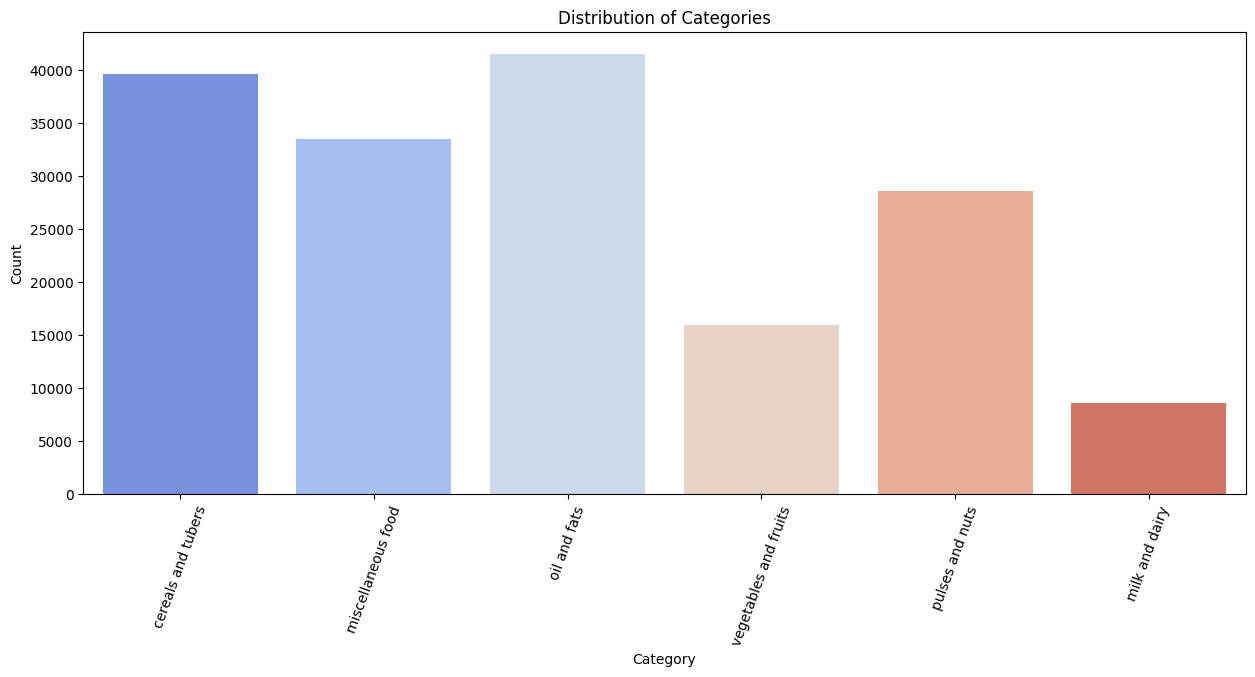

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='category',palette="coolwarm")
plt.xticks(rotation=70)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()

<ipython-input-267-eb9f6c229faf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pricetype',palette="coolwarm")


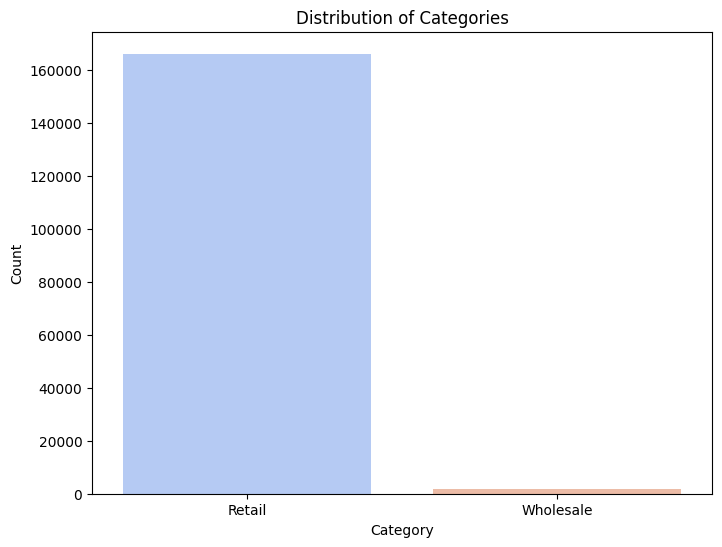

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='pricetype',palette="coolwarm")
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()

<ipython-input-268-e381e467a4c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='category', y='price',palette="viridis")


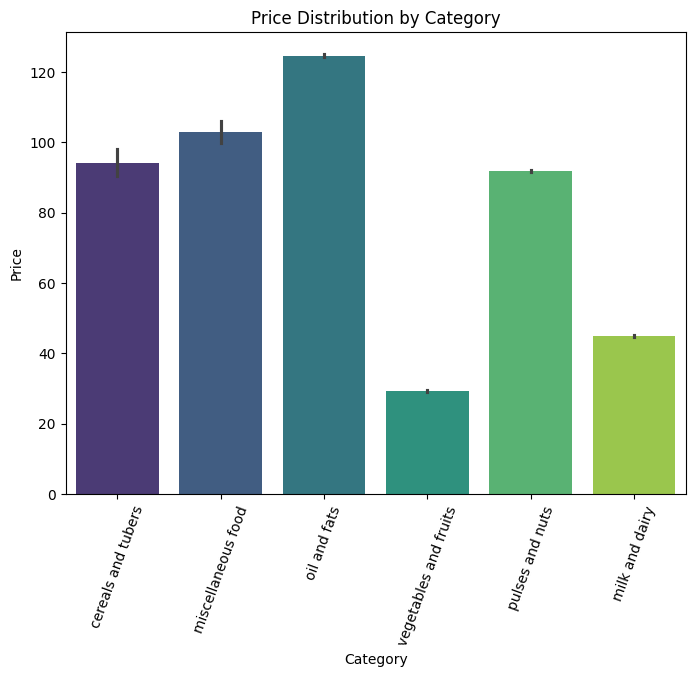

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='category', y='price',palette="viridis")
plt.xticks(rotation=70)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Price Distribution by Category')
plt.show()

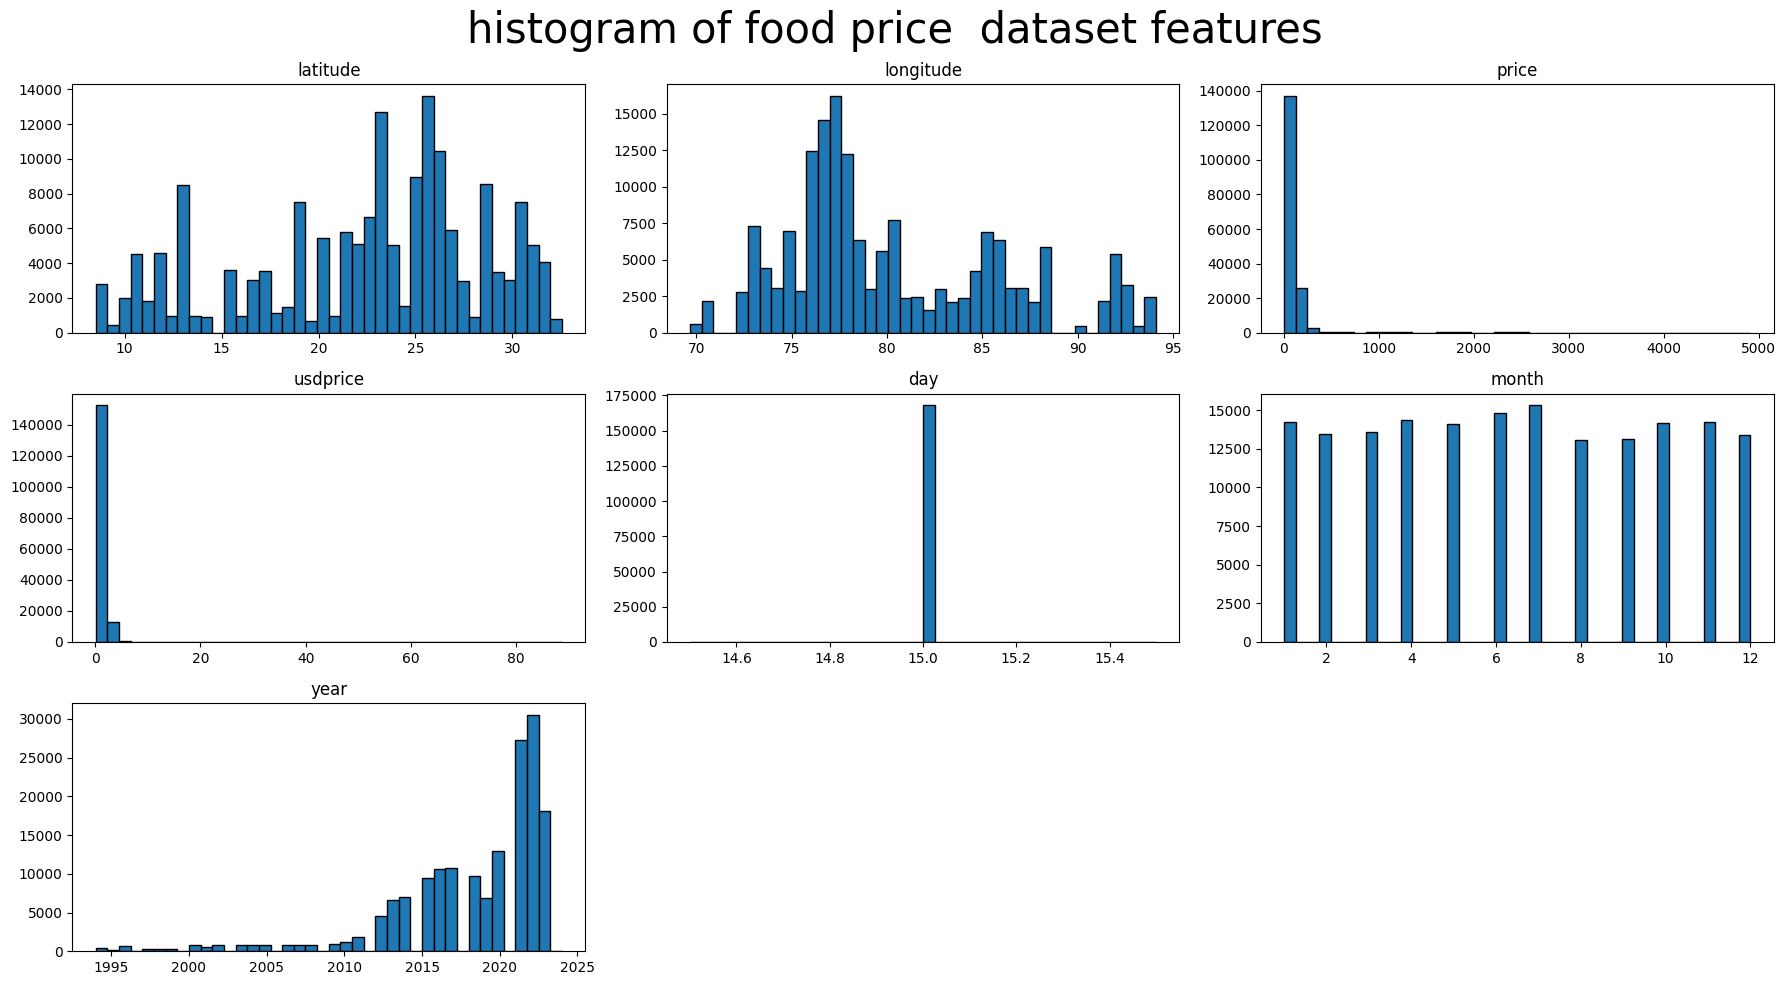

In [ ]:
# ploting histogram for each  numerical feature
df.hist(edgecolor="black",figsize=(18,10),grid=False,bins=40)
plt.suptitle("histogram of food price  dataset features",fontsize=30)
plt.tight_layout()
plt.show()

# **5- Correlation analysis**

**convert categorical variable to numeric**

In [ ]:
# Replacing categorical values with numerical values
df['pricetype'].replace(["Retail","Wholesale"],
                       [0,1],inplace=True)


df['unit'].replace(["L","KG","100 KG"],
                       [0,1,2],inplace=True)

<ipython-input-270-ac51c1abe806>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pricetype'].replace(["Retail","Wholesale"],
<ipython-input-270-ac51c1abe806>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pricetype'].replace(["Retail","Wholesale"],
<ipython-input-270-ac51c1abe806>:6: Futu

In [ ]:
# importing labelencoding from sklearn library from preprocessing module.
from sklearn.preprocessing import LabelEncoder

# creating a instance of label encoder
le=LabelEncoder()

# Applying LabelEncoder to each column
df['category']=le.fit_transform(df['category'])
df['admin1']=le.fit_transform(df['admin1'])
df['admin2']=le.fit_transform(df['admin2'])
df['market']=le.fit_transform(df['market'])
df['commodity']=le.fit_transform(df['commodity'])

In [ ]:
df.drop(columns={"day"},inplace=True)

In [ ]:
# correlation matrix of food price dataset
correlation_matrix=df.corr()
correlation_matrix

,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,price,usdprice,month,year
admin1,1.000000,0.011937,-0.104345,0.009990,0.023309,0.000826,0.004146,-0.010305,-0.040323,-0.032491,-0.032524,-0.001035,-0.017259
admin2,0.011937,1.000000,0.646884,-0.074041,0.048989,0.020401,-0.019174,0.005988,-0.007556,-0.000126,-0.006136,-0.007878,0.104283
market,-0.104345,0.646884,1.000000,-0.157540,0.016009,0.023670,-0.017666,0.008824,-0.013304,-0.003903,-0.008979,0.002095,0.084016
latitude,0.009990,-0.074041,-0.157540,1.000000,0.067729,0.008992,-0.003832,-0.006153,-0.016454,-0.025636,-0.024397,-0.002194,-0.009169
longitude,0.023309,0.048989,0.016009,0.067729,1.000000,0.008093,0.000605,-0.007321,-0.038818,-0.040193,-0.042523,-0.002483,0.007701
category,0.000826,0.020401,0.023670,0.008992,0.008093,1.000000,-0.500017,0.113146,-0.137657,-0.025723,-0.050436,0.002703,0.178933
commodity,0.004146,-0.019174,-0.017666,-0.003832,0.000605,-0.500017,1.000000,0.217842,0.095278,-0.005290,0.016791,-0.001172,-0.134489
unit,-0.010305,0.005988,0.008824,-0.006153,-0.007321,0.113146,0.217842,1.000000,0.449761,0.414012,0.430610,0.000227,-0.088128
pricetype,-0.040323,-0.007556,-0.013304,-0.016454,-0.038818,-0.137657,0.095278,0.449761,1.000000,0.859590,0.907978,0.000791,-0.154986
price,-0.032491,-0.000126,-0.003903,-0.025636,-0.040193,-0.025723,-0.005290,0.414012,0.859590,1.000000,0.980352,0.002254,-0.005635


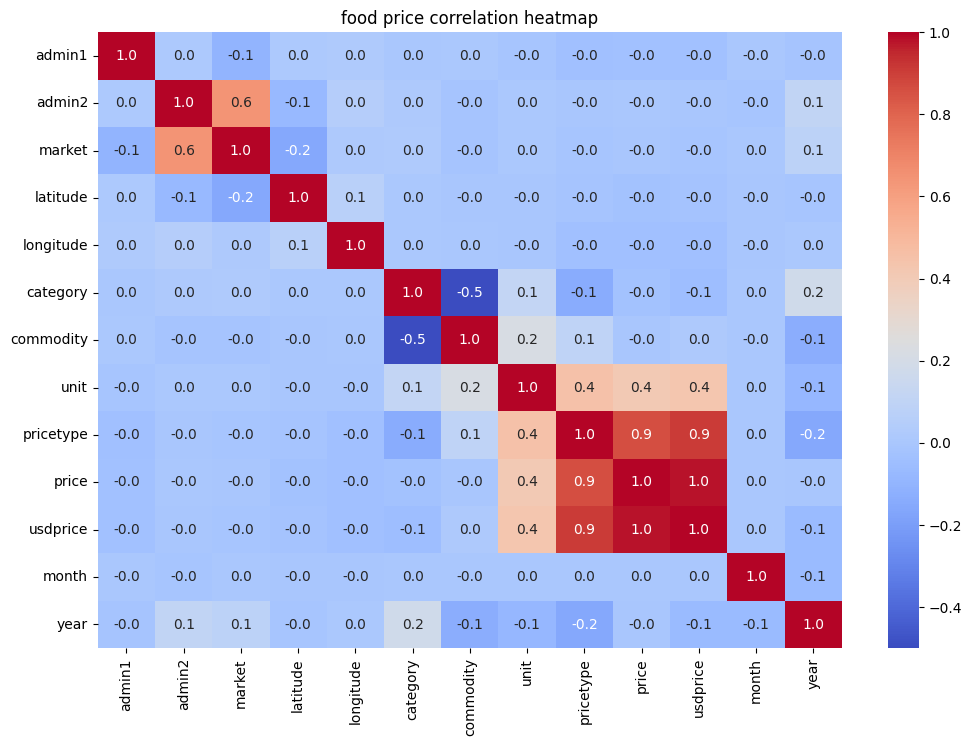

In [ ]:
# Heatmap of correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,fmt='0.01f',cmap="coolwarm")
plt.title("food price correlation heatmap")
plt.show()

In [ ]:
df.drop(columns={"admin1","admin2","market","latitude","commodity","month","longitude","year"},inplace=True)

### **removing skewness**

In [ ]:
df.skew()

,0
category,-0.137045
unit,-2.167653
pricetype,9.256898
price,10.764571
usdprice,10.516007


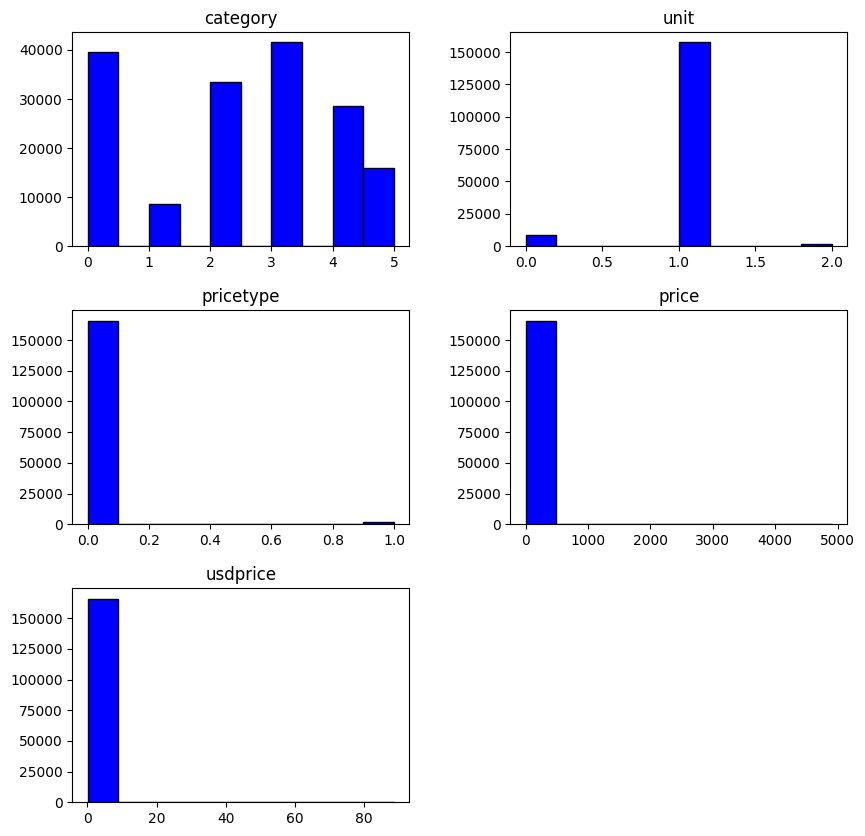

In [ ]:
df.hist(color="blue",edgecolor="black",grid=False,figsize=(10,10))
plt.show()

In [ ]:
df["category"]=np.log1p(df["category"])
df["usdprice"]=np.log1p(df["usdprice"])
df["unit"]=np.log1p(df["unit"])
df["pricetype"]=np.log1p(df["pricetype"])

In [ ]:
df.skew()

,0
category,-0.742963
unit,-3.411879
pricetype,9.256898
price,10.764571
usdprice,2.696578


# **6- Outlier Detection**

<Figure size 1200x600 with 0 Axes>

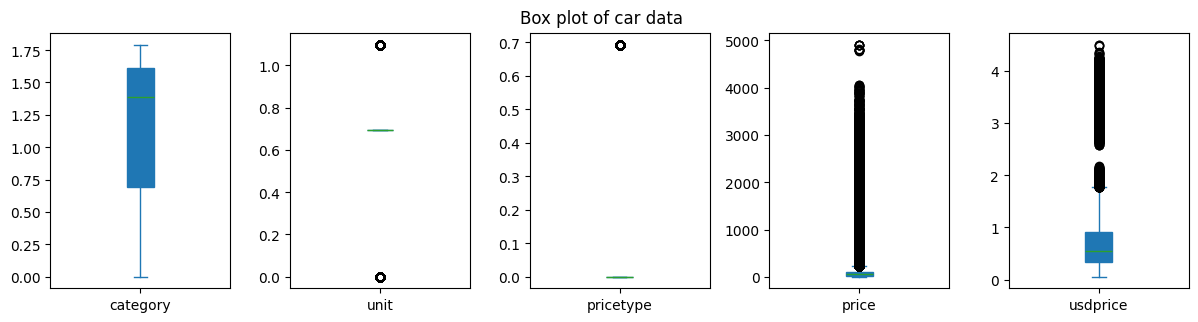

In [ ]:
plt.figure(figsize=(12,6))
df.plot(kind="box",layout=(4,5),figsize=(12,12),subplots=True,vert=True,patch_artist=True)
plt.suptitle("Box plot of car data ")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Calculate Q1 and Q3
Q1 = df['usdprice'].quantile(0.25)
Q3 = df['usdprice'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df = df[(df['usdprice'] >= (Q1 - 1.5 * IQR)) & (df['usdprice'] <= (Q3 + 1.5 * IQR))]

In [ ]:
import numpy as np
import pandas as pd

# Calculate Q1 and Q3
Q1 = df['unit'].quantile(0.25)
Q3 = df['unit'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df = df[(df['unit'] >= (Q1 - 1.5 * IQR)) & (df['unit'] <= (Q3 + 1.5 * IQR))]

In [ ]:
import numpy as np
import pandas as pd

# Calculate Q1 and Q3
Q1 = df['category'].quantile(0.25)
Q3 = df['category'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df = df[(df['category'] >= (Q1 - 1.5 * IQR)) & (df['category'] <= (Q3 + 1.5 * IQR))]

<Figure size 1200x600 with 0 Axes>

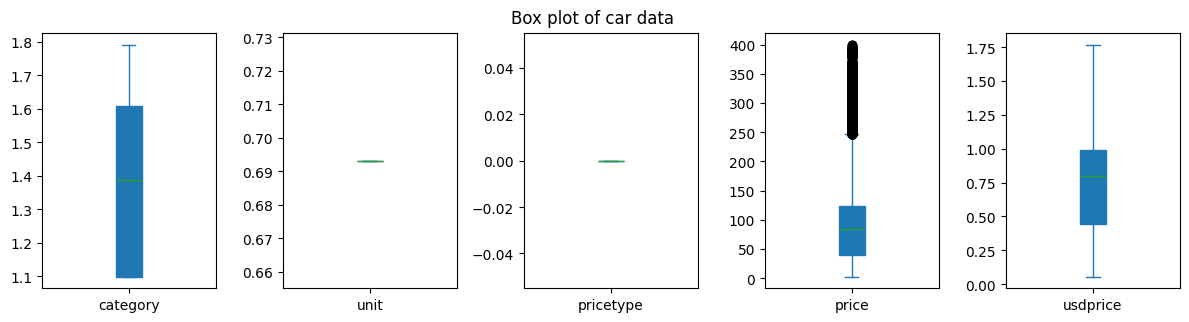

In [ ]:
plt.figure(figsize=(12,6))
df.plot(kind="box",layout=(4,5),figsize=(12,12),subplots=True,vert=True,patch_artist=True)
plt.suptitle("Box plot of car data ")
plt.tight_layout()
plt.show()

# **7- Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df[['category','unit','pricetype','usdprice','price']] = standard_scaler.fit_transform(df[['category','unit','pricetype','usdprice','price']])

# **8 -Initial Modeling and Hypothesis Testing**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Define features and target variable
X = df[['category','unit','pricetype','usdprice']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a baseline logistic regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_pred,y_test)
print('mean squared error:=',mse)
print('mean absolute error:=',mae)
r2_score=r2_score(y_test,y_pred)
print('r2_score:=',r2_score)

mean squared error:= 0.08368578337802259
mean absolute error:= 0.20924912739752846
r2_score:= 0.9182721637725044


# **Final Report: Exploratory Data Analysis on Food Price Indices**

# **Introduction**
This project aims to analyze the food price index trends using Exploratory Data Analysis (EDA). By examining price fluctuations over time, we gain insights into market patterns, correlations, and anomalies affecting food prices.

# **Key Findings**
**1. Data Quality and Preprocessing**

The dataset contained missing values, which were handled using appropriate imputation techniques.
Data cleaning ensured consistency in date formats and standardized column names.
Outliers were identified and analyzed to check their impact on price trends.

**2. Trend Analysis**

The food price index exhibited seasonal variations, with noticeable peaks and declines at specific time intervals.
Global economic events influenced price fluctuations, causing significant spikes in certain periods.

**3. Correlation and Patterns**

Some commodities showed strong positive correlations, indicating price movements in tandem.
External factors such as inflation and supply chain disruptions played a role in price volatility.

**4. Anomaly Detection**

Sudden price drops or spikes were detected, potentially due to economic policies, climate conditions, or market shocks.

# **Conclusion**

The EDA revealed critical insights into food price index behavior, identifying seasonal trends, correlations, and anomalies. These findings help stakeholders, including policymakers and businesses, in decision-making and forecasting future price trends.